In [18]:
'''
So we have a set of points, how do we cluster the points so that they are grouped correctly?
'''

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits, load_iris
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.cluster import KMeans
from IPython.display import Image

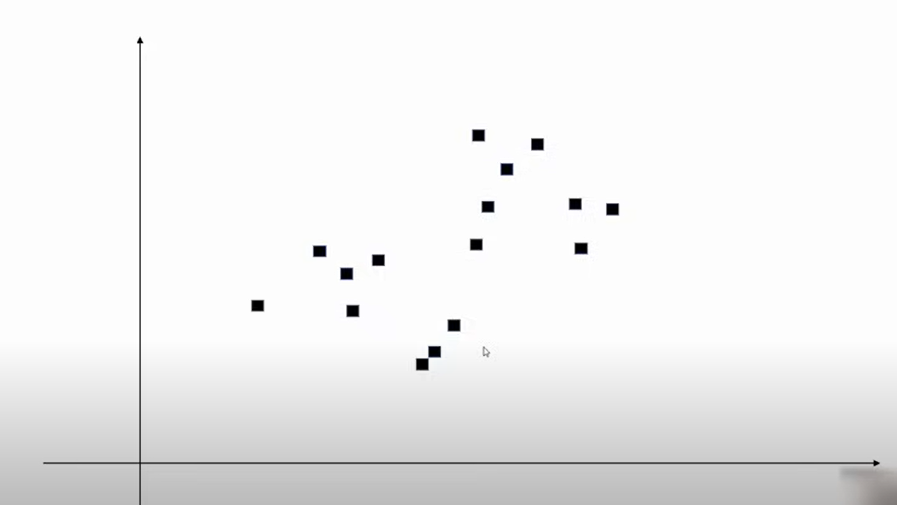

In [2]:
'''
The plan (shown by all of the stars):
1. Input the amount of clusters (k clusters)
2. k stars will be put on random locations
3. a barrier will be put in between them, separating the stars into areas
4. the centriod of all the points in the area will be the new location of the star
5. repeat this process until the stars do not move 
6. the points of this new area will be true cluster

But how do we know if the amount of clusters we have is correct
1. with star locations in place, we can calculate the deviation of the points by summing distance squared
2. look at the elbow image, where the error changes the most between ks is the correct amount of clusters
'''
Image('pts.png')

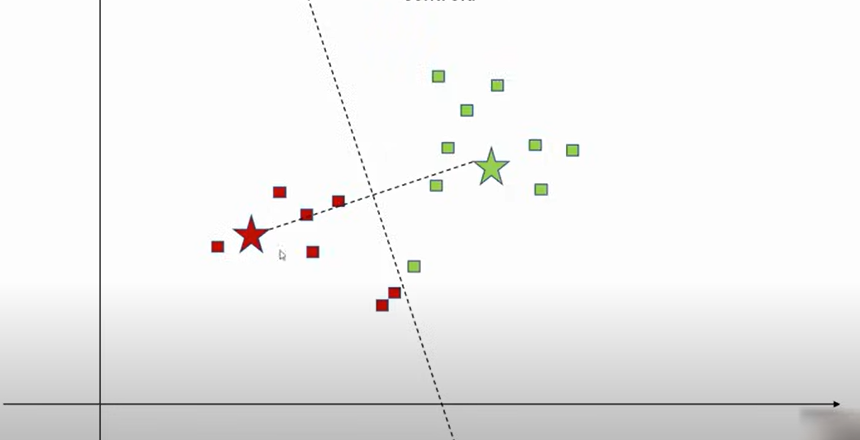

In [3]:
Image('pts2.png')

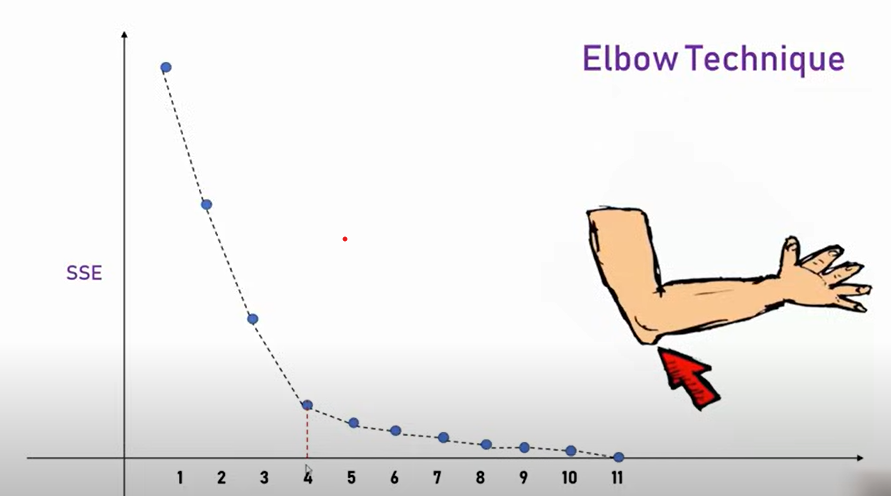

In [4]:
Image('elbow.png')

In [5]:
df = pd.read_csv('income.csv')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


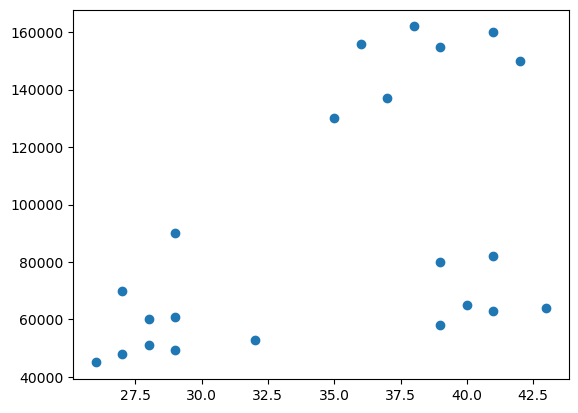

In [7]:
plt.scatter(df['Age'], df['Income($)'])

In [9]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [11]:
#predicted cluster
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

C:\Users\wayla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\wayla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [14]:
df['cluster'] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


Text(0, 0.5, 'Income ($)')

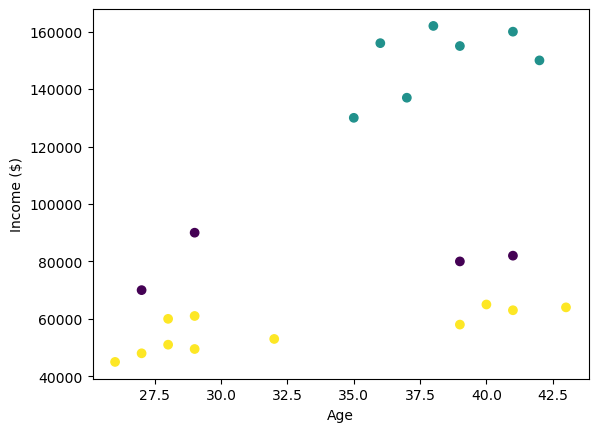

In [16]:
#didn't work because the units weigh more for y than x

plt.scatter(df['Age'], df['Income($)'], c=df['cluster'])
plt.xlabel('Age')
plt.ylabel('Income ($)')

In [22]:
'''
Scalers: Rescale data so values are compared correctly
- StandardScalar: changes values to set with mean=0 & sd=1
- MinMaxScalar: changes values to set between 0 and 1
'''

scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['scaledIncome'] = scaler.transform(df[['Income($)']])
df

,Name,Age,Income($),cluster,scaledIncome
0,Rob,27,70000,0,0.213675
1,Michael,29,90000,0,0.384615
2,Mohan,29,61000,2,0.136752
3,Ismail,28,60000,2,0.128205
4,Kory,42,150000,1,0.897436
5,Gautam,39,155000,1,0.940171
6,David,41,160000,1,0.982906
7,Andrea,38,162000,1,1.000000
8,Brad,36,156000,1,0.948718
9,Angelina,35,130000,1,0.726496


In [25]:
df['scaledAge'] = scaler.fit_transform(df[['Age']])
df

,Name,Age,Income($),cluster,scaledIncome,scaledAge
0,Rob,27,70000,0,0.213675,0.058824
1,Michael,29,90000,0,0.384615,0.176471
2,Mohan,29,61000,2,0.136752,0.176471
3,Ismail,28,60000,2,0.128205,0.117647
4,Kory,42,150000,1,0.897436,0.941176
5,Gautam,39,155000,1,0.940171,0.764706
6,David,41,160000,1,0.982906,0.882353
7,Andrea,38,162000,1,1.000000,0.705882
8,Brad,36,156000,1,0.948718,0.588235
9,Angelina,35,130000,1,0.726496,0.529412


In [27]:
km2 = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['scaledAge', 'scaledIncome']])
df['scaledCluster'] = y_predicted
df

C:\Users\wayla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\wayla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Name,Age,Income($),cluster,scaledIncome,scaledAge,scaledCluster
0,Rob,27,70000,0,0.213675,0.058824,2
1,Michael,29,90000,0,0.384615,0.176471,2
2,Mohan,29,61000,2,0.136752,0.176471,2
3,Ismail,28,60000,2,0.128205,0.117647,2
4,Kory,42,150000,1,0.897436,0.941176,1
5,Gautam,39,155000,1,0.940171,0.764706,1
6,David,41,160000,1,0.982906,0.882353,1
7,Andrea,38,162000,1,1.000000,0.705882,1
8,Brad,36,156000,1,0.948718,0.588235,1
9,Angelina,35,130000,1,0.726496,0.529412,1


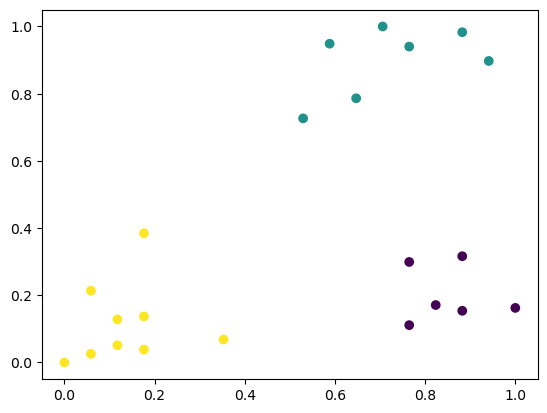

In [28]:
#now it works
plt.scatter(df['scaledAge'], df['scaledIncome'], c=df['scaledCluster'])

In [41]:
#centriods
centers = km.cluster_centers_
print(centers)
centers[:, 1]

[[0.85294118 0.2022792 ]
 [0.72268908 0.8974359 ]
 [0.1372549  0.11633428]]


array([0.2022792 , 0.8974359 , 0.11633428])

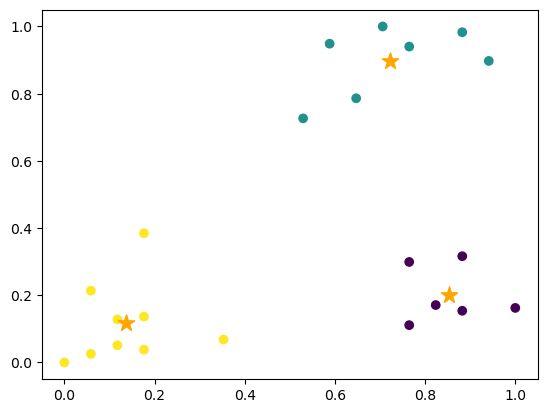

In [39]:
plt.scatter(df['scaledAge'], df['scaledIncome'], c=df['scaledCluster'])
plt.scatter(centers[:, 0], centers[:, 1], 150, c='orange', marker='*')

In [45]:
#Elbow Technique
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['scaledAge', 'scaledIncome']])
    sse.append(km.inertia_)
sse

C:\Users\wayla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\wayla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\wayla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\wayla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419566,
 0.27558255687229766,
 0.21055478995472493,
 0.17299621932455467,
 0.14258711825476092,
 0.10188787724979426]

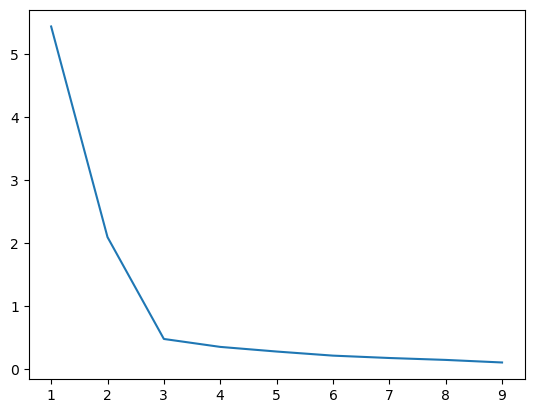

In [47]:
plt.plot(k_rng, sse)

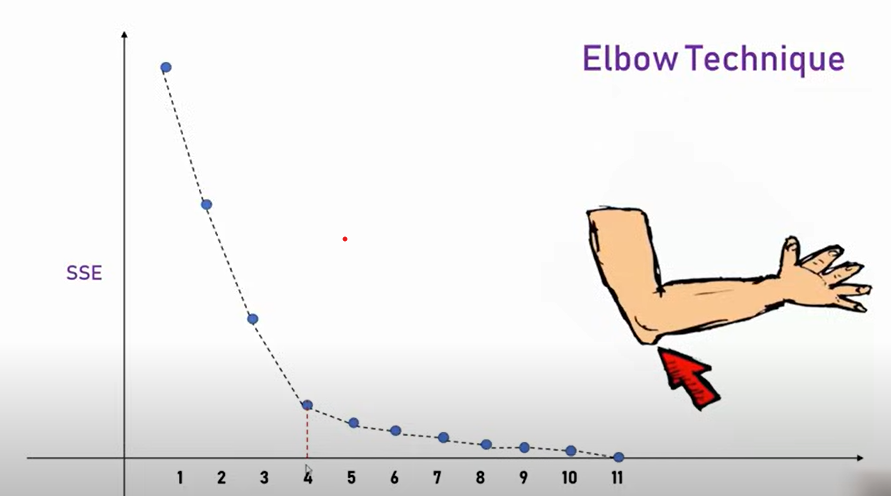

In [46]:
Image('elbow.png')

In [48]:
iris = load_iris()

In [50]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [52]:
df2 = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df2['target'] = iris.target
df2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Text(0, 0.5, 'petal width (cm)')

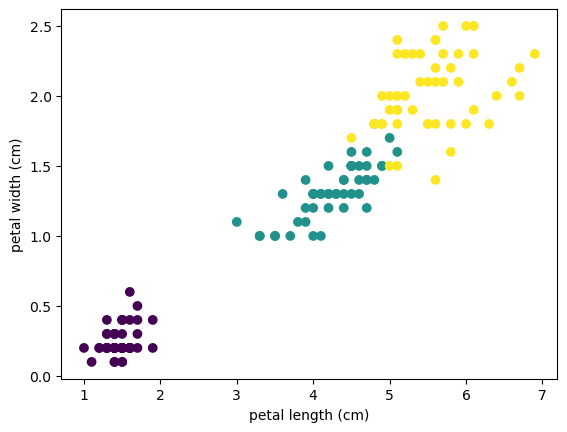

In [56]:
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], c=iris.target)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [59]:
scaler = MinMaxScaler()
df2['scaledPetalLength'] = scaler.fit_transform(df2[['petal length (cm)']])
df2['scaledPetalWidth'] = scaler.fit_transform(df2[['petal width (cm)']])
df2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,scaledPetalLength,scaledPetalWidth
0,5.1,3.5,1.4,0.2,0,0.067797,0.041667
1,4.9,3.0,1.4,0.2,0,0.067797,0.041667
2,4.7,3.2,1.3,0.2,0,0.050847,0.041667
3,4.6,3.1,1.5,0.2,0,0.084746,0.041667
4,5.0,3.6,1.4,0.2,0,0.067797,0.041667
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0.711864,0.916667
146,6.3,2.5,5.0,1.9,2,0.677966,0.750000
147,6.5,3.0,5.2,2.0,2,0.711864,0.791667
148,6.2,3.4,5.4,2.3,2,0.745763,0.916667


In [74]:
km3 = KMeans(n_clusters=3)
predicted = km3.fit_predict(df2[['scaledPetalLength', 'scaledPetalWidth']])
df2['cluster'] = predicted

C:\Users\wayla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\wayla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [75]:
df2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,scaledPetalLength,scaledPetalWidth,cluster
0,5.1,3.5,1.4,0.2,0,0.067797,0.041667,0
1,4.9,3.0,1.4,0.2,0,0.067797,0.041667,0
2,4.7,3.2,1.3,0.2,0,0.050847,0.041667,0
3,4.6,3.1,1.5,0.2,0,0.084746,0.041667,0
4,5.0,3.6,1.4,0.2,0,0.067797,0.041667,0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0.711864,0.916667,1
146,6.3,2.5,5.0,1.9,2,0.677966,0.750000,1
147,6.5,3.0,5.2,2.0,2,0.711864,0.791667,1
148,6.2,3.4,5.4,2.3,2,0.745763,0.916667,1


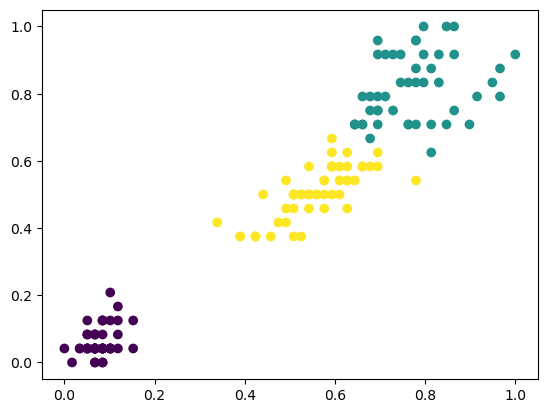

In [76]:
#cluster prediction
plt.scatter(df2['scaledPetalLength'], df2['scaledPetalWidth'], c=df2['cluster'])

Text(0, 0.5, 'petal width (cm)')

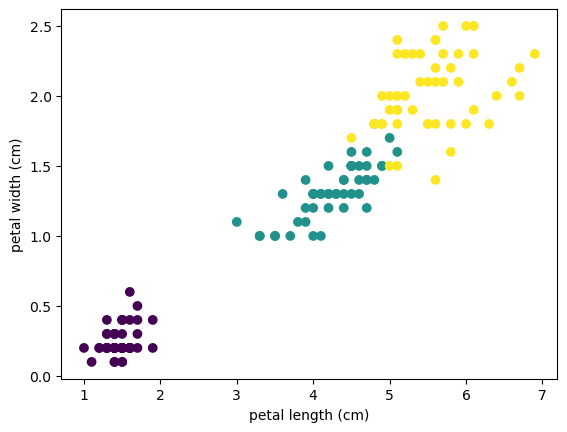

In [77]:
#actual cluster
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], c=iris.target)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')